# 1. Airlines Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import warnings                
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
data = pd.read_excel(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Forecasting\Airlines+Data.xlsx')
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


# Dataset Structure and Content

In [3]:
data.shape

(96, 2)

In [4]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


There are no missing values

# Feature Extraction

In [6]:
# making the 'month' column as index
data.set_index('Month',inplace=True)

In [7]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [8]:
# checking duplicates
data.duplicated().any()

True

In [11]:
# count of duplicates
data.duplicated().value_counts()

False    80
True     16
dtype: int64

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(80, 1)

Duplicates removed

# Visualizing the Time Series

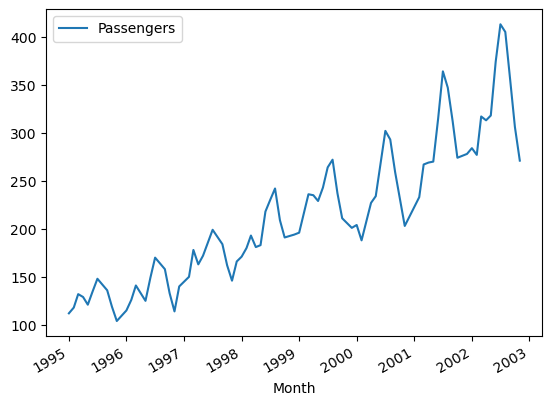

In [14]:
data.plot()
plt.show()

1. There is an uptrend in the volume of Passengers, with some seasonality.
2. Therefore, we have to perform stationarity for building reliable time series model.

# Methods to fix Stationarity

## 1. Splitting the Time Series

In [15]:
# Split the time series into two segments
split_index = len(data) // 2
first_half = data['Passengers'].iloc[:split_index]
second_half = data['Passengers'].iloc[split_index:]

# Calculate mean and variance for each segment
mean_first_half = first_half.mean()
variance_first_half = first_half.var()

mean_second_half = second_half.mean()
variance_second_half = second_half.var()

# Print the summary statistics
print("Summary Statistics for Stationarity Check:")
print("First Half - Mean:", mean_first_half, "Variance:", variance_first_half)
print("Second Half - Mean:", mean_second_half, "Variance:", variance_second_half)

Summary Statistics for Stationarity Check:
First Half - Mean: 157.2 Variance: 1166.2666666666664
Second Half - Mean: 274.75 Variance: 3321.3205128205127


There is a difference in both mean and variance between the two halves, suggesting that the time series is not stationary.

## 2. Augmented Dickey-Fuller (ADF) Test

In [16]:
from statsmodels.tsa.stattools import adfuller

# Performing Dickey-Fuller test
result = adfuller(data['Passengers'])

# Extract and print the results
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Dickey-Fuller Test Results:
Test Statistic: 0.913744210615321
P-Value: 0.9932670959770876
Number of Lags Used: 9
Number of Observations Used: 70
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653


1. T Statistic (0.913744) is likely to be greater than the critical values at all significance levels.
2. The P-Value (0.99326) is significantly higher than 0.05.
3. Therefore, Dickey-Fuller Test fails to reject the null hypothesis, indicating that the time series is likely non-stationary.

## 3. Log Transformation

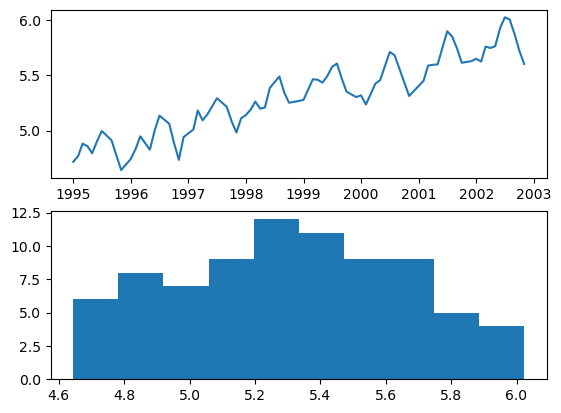

Mean of 'Passengers': 5.315108792330033
Variance of 'Passengers': 0.12263824627203053


In [17]:
from numpy import log
data['Passengers'] = log(data['Passengers'])

#plt.subplot(data['Passengers'])
#plt.title('Log-Transformed Time Series')
#plt.show()

# line plot
plt.subplot(211)
plt.plot(data['Passengers'])

# histogram
plt.subplot(212)
plt.hist(data['Passengers'])
plt.show()

mean_log_series = data['Passengers'].mean()
# Print the mean
print(f"Mean of 'Passengers': {mean_log_series}")

variance_log_series = data['Passengers'].var()
# Print the variance
print(f"Variance of 'Passengers': {variance_log_series}")

In [18]:
# checking for stationarity
result_adf_log = adfuller(data['Passengers'].dropna())

# Extract and print the p-value
p_value_adf_log = result_adf_log[1]
print(f'ADF Test P-Value for Log-Transformed Series: {p_value_adf_log}')

# Interpret the result
if p_value_adf_log < 0.05:
    print("The log-transformed series is likely stationary.")
else:
    print("The log-transformed series is likely not stationary.")

ADF Test P-Value for Log-Transformed Series: 0.8821897982975337
The log-transformed series is likely not stationary.


## 4. Square Root Transformation

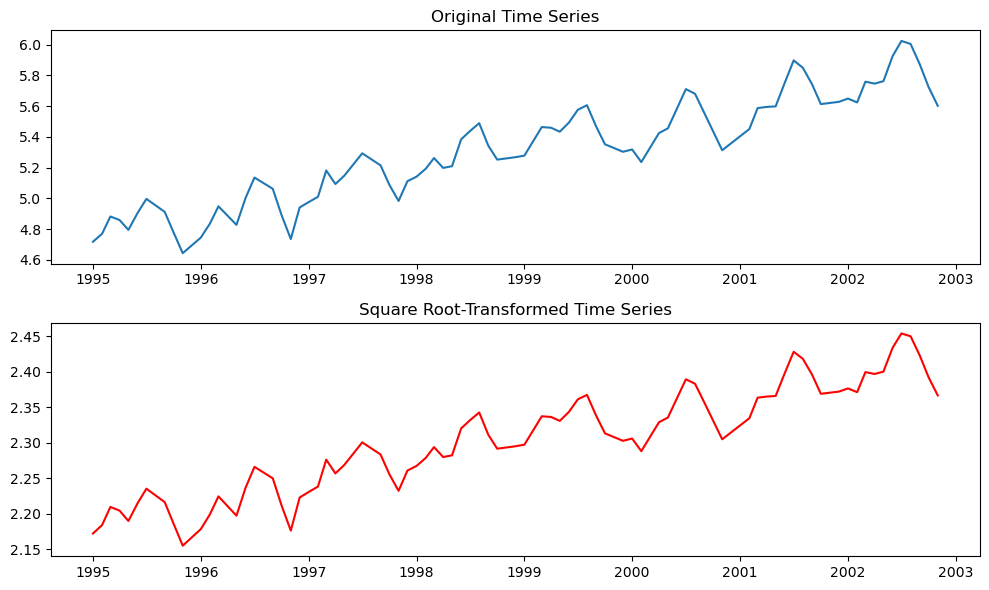

Augmented Dickey-Fuller Test Results for Square Root-Transformed Series:
Test Statistic: -0.7015641003153794
P-Value: 0.8463439845606
Number of Lags Used: 9
Number of Observations Used: 70
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653
The square root-transformed series is likely not stationary.


In [19]:
# Square root transformation
data['Passengers_sqrt'] = np.sqrt(data['Passengers'])

# Plot the original and square root-transformed series for visual inspection
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Passengers'])
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(data['Passengers_sqrt'], color='red')
plt.title('Square Root-Transformed Time Series')

plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test on the square root-transformed series
result_sqrt = adfuller(data['Passengers_sqrt'])

# Extract and print the results
print('Augmented Dickey-Fuller Test Results for Square Root-Transformed Series:')
print(f'Test Statistic: {result_sqrt[0]}')
print(f'P-Value: {result_sqrt[1]}')
print(f'Number of Lags Used: {result_sqrt[2]}')
print(f'Number of Observations Used: {result_sqrt[3]}')
print('Critical Values:')
for key, value in result_sqrt[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result_sqrt[1] < 0.05:
    print("The square root-transformed series is likely stationary.")
else:
    print("The square root-transformed series is likely not stationary.")

# Up Sampling due to irregular sampled Time Series and missing values

In [20]:
upsampled = data.resample('M').mean()
print(upsampled.head(10))

            Passengers  Passengers_sqrt
Month                                  
1995-01-31    4.718499         2.172211
1995-02-28    4.770685         2.184190
1995-03-31    4.882802         2.209706
1995-04-30    4.859812         2.204498
1995-05-31    4.795791         2.189929
1995-06-30    4.905275         2.214785
1995-07-31    4.997212         2.235445
1995-08-31         NaN              NaN
1995-09-30    4.912655         2.216451
1995-10-31    4.779123         2.186121


In [21]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))

            Passengers  Passengers_sqrt
Month                                  
1995-01-31    4.718499         2.172211
1995-02-28    4.770685         2.184190
1995-03-31    4.882802         2.209706
1995-04-30    4.859812         2.204498
1995-05-31    4.795791         2.189929
1995-06-30    4.905275         2.214785
1995-07-31    4.997212         2.235445
1995-08-31    4.954934         2.225948
1995-09-30    4.912655         2.216451
1995-10-31    4.779123         2.186121


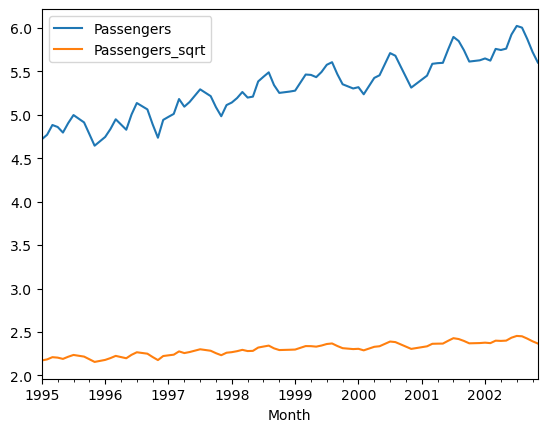

In [22]:
interpolated.plot()
plt.show()

In [23]:
Train = interpolated.head(81)
Test  = interpolated.tail(14)

## 5. Moving Average

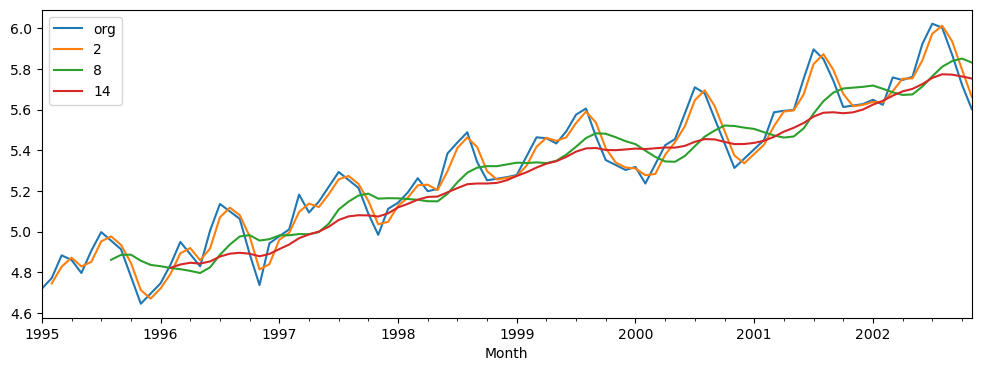

In [24]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,18,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

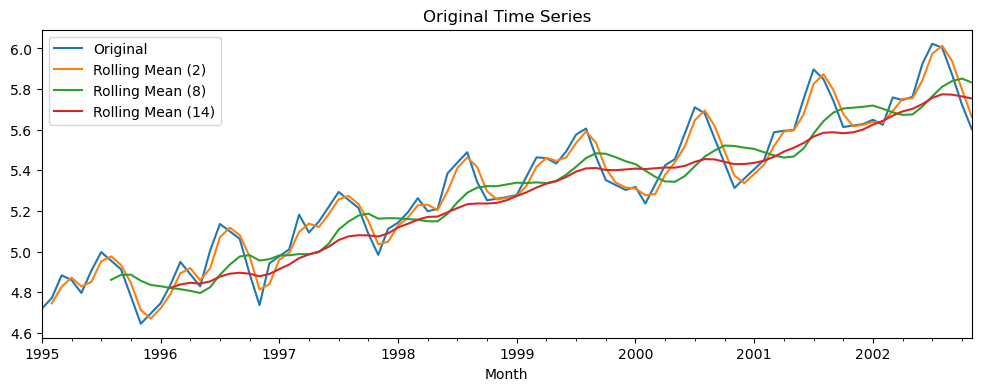

ADF Test P-Value: 0.754523864824944
The time series is likely not stationary.


In [25]:
# checking for stationarity
plt.figure(figsize=(12, 4))
interpolated['Passengers'].plot(label='Original')
plt.title('Original Time Series')

# Plot rolling means with different window sizes
for window_size in range(2, 18, 6):
    interpolated['Passengers'].rolling(window=window_size).mean().plot(label=f'Rolling Mean ({window_size})')

plt.legend(loc='best')
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test
result_adf = adfuller(interpolated['Passengers'].dropna())
p_value_adf = result_adf[1]

# Interpret the result
print(f'ADF Test P-Value: {p_value_adf}')
if p_value_adf < 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely not stationary.")

## 6. Time Series Decomposition Plot

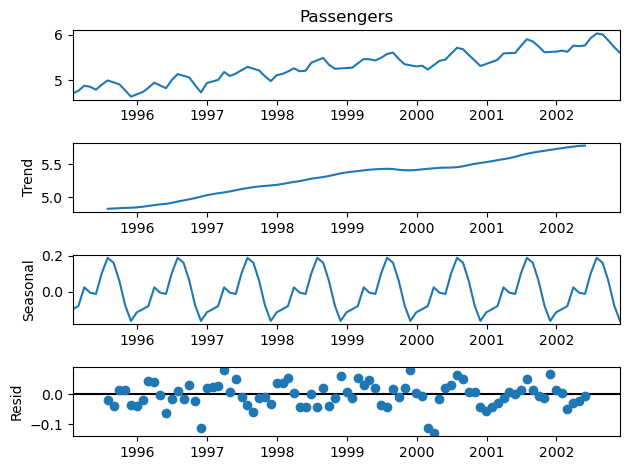

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(interpolated.Passengers)  
decompose_ts_add.plot()
plt.show()

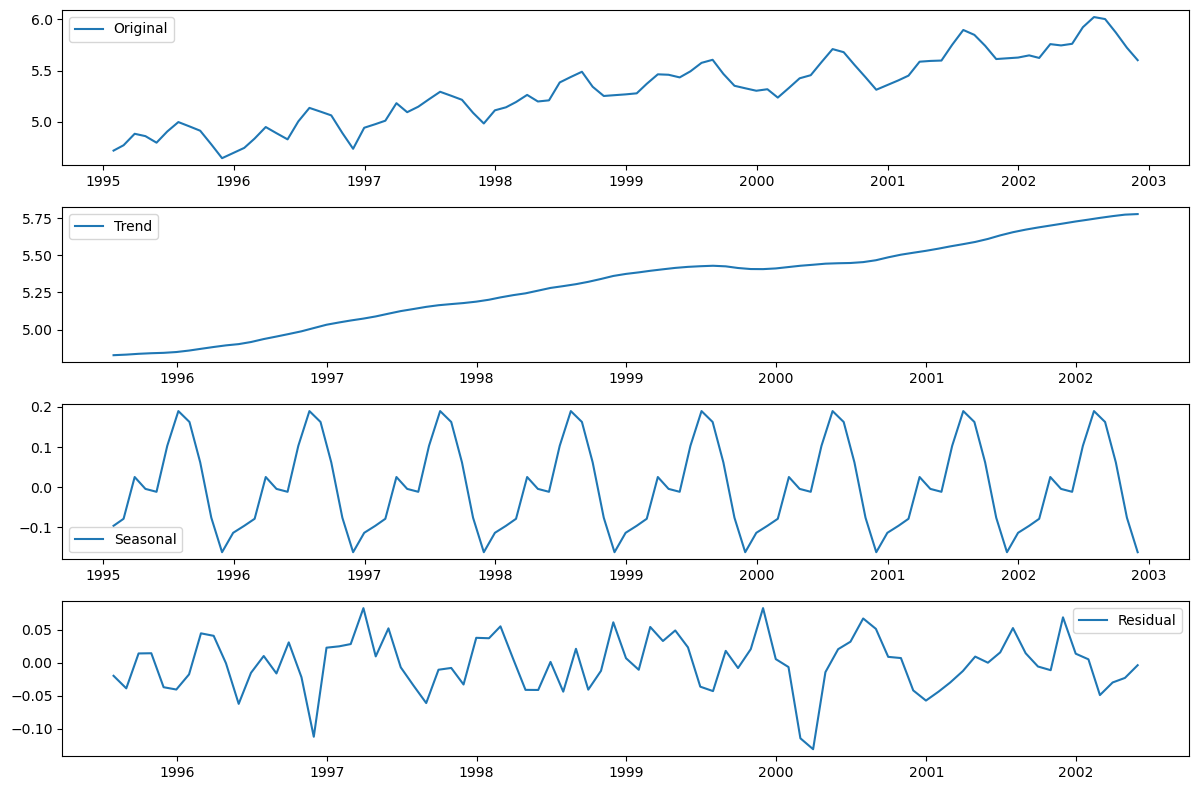

ADF Test P-Value for Residual Component: 5.109318491665753e-09
The residual component is likely stationary.


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Perform seasonal decomposition
decompose_result = seasonal_decompose(interpolated['Passengers'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(interpolated['Passengers'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decompose_result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decompose_result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decompose_result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test on the residual component
result_adf_residual = adfuller(decompose_result.resid.dropna())

# Extract and print the p-value
p_value_adf_residual = result_adf_residual[1]
print(f'ADF Test P-Value for Residual Component: {p_value_adf_residual}')

# Interpret the result
if p_value_adf_residual < 0.05:
    print("The residual component is likely stationary.")
else:
    print("The residual component is likely not stationary.")

# Plotting ACF and PACF

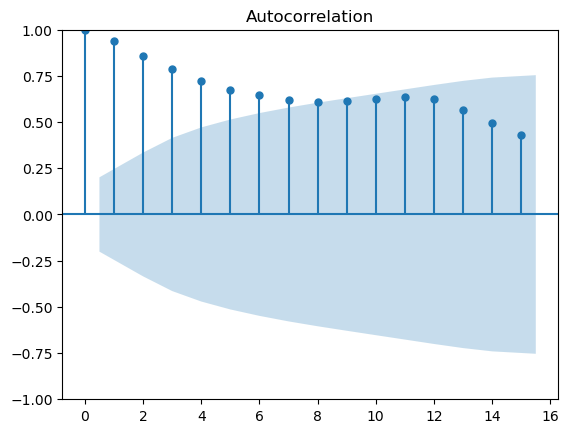

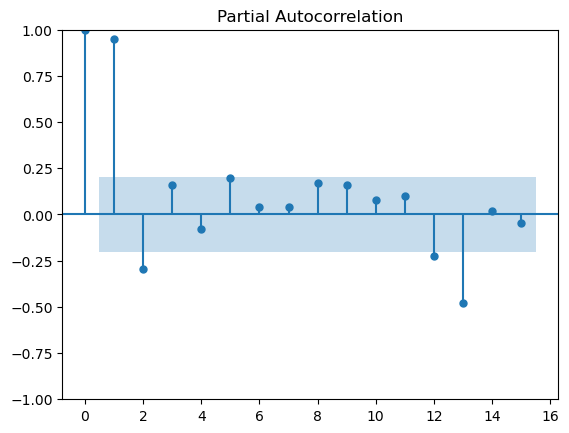

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=15)
tsa_plots.plot_pacf(interpolated.Passengers,lags=15)
plt.show()

# 1. Simple Exponential Method

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# defining mape()
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

2.077381353142768

# 2. Holt Method

In [31]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

2.073938886422458

# 3. Holts winter exponential smoothing with additive seasonality and additive trend

In [32]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

0.8034042833877836

# 4. Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [33]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

0.8051966776109635

# Final Model by combining train and test

In [35]:
# Forecasting for next 10 time periods
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()
hwe_model_add_add.forecast(10)

2002-12-31    5.631151
2003-01-31    5.672108
2003-02-28    5.683184
2003-03-31    5.709413
2003-04-30    5.698307
2003-05-31    5.686244
2003-06-30    5.673919
2003-07-31    5.675240
2003-08-31    5.700812
2003-09-30    5.699074
Freq: M, dtype: float64

In [36]:
interpolated.reset_index(inplace=True)

In [38]:
interpolated['t'] = 1
interpolated.head()

,Month,Passengers,Passengers_sqrt,t
0,1995-01-31,4.718499,2.172211,1
1,1995-02-28,4.770685,2.184190,1
2,1995-03-31,4.882802,2.209706,1
3,1995-04-30,4.859812,2.204498,1
4,1995-05-31,4.795791,2.189929,1


In [40]:
# iterating over the rows of the interpolated DataFrame and setting the values in the 't' column based on the row index (i+1)
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1
interpolated.head()

,Month,Passengers,Passengers_sqrt,t
0,1995-01-31,4.718499,2.172211,1
1,1995-02-28,4.770685,2.184190,2
2,1995-03-31,4.882802,2.209706,3
3,1995-04-30,4.859812,2.204498,4
4,1995-05-31,4.795791,2.189929,5


In [41]:
# Squaring
interpolated['t_sq'] = (interpolated['t'])**2
interpolated.head()

,Month,Passengers,Passengers_sqrt,t,t_sq
0,1995-01-31,4.718499,2.172211,1,1
1,1995-02-28,4.770685,2.184190,2,4
2,1995-03-31,4.882802,2.209706,3,9
3,1995-04-30,4.859812,2.204498,4,16
4,1995-05-31,4.795791,2.189929,5,25


In [42]:
# adding two new columns, 'month' and 'year', to the interpolated DataFrame based on the 'Month' column
interpolated['month'] = interpolated.Month.dt.strftime("%b")
interpolated["year"] = interpolated.Month.dt.strftime("%Y")
interpolated.head()

,Month,Passengers,Passengers_sqrt,t,t_sq,month,year
0,1995-01-31,4.718499,2.172211,1,1,Jan,1995
1,1995-02-28,4.770685,2.184190,2,4,Feb,1995
2,1995-03-31,4.882802,2.209706,3,9,Mar,1995
3,1995-04-30,4.859812,2.204498,4,16,Apr,1995
4,1995-05-31,4.795791,2.189929,5,25,May,1995


In [44]:
# creating dummies
months = pd.get_dummies(interpolated['month'])
months.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
# dummy variables in order
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [48]:
# concatenating two DataFrames (interpolated and months)
data1 = pd.concat([interpolated,months],axis=1)
data1.head()

,Month,Passengers,Passengers_sqrt,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,4.718499,2.172211,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,4.770685,2.184190,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,4.882802,2.209706,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,4.859812,2.204498,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,4.795791,2.189929,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
# log
data1['log_passengers'] = np.log(data1['Passengers'])
data1.head()

,Month,Passengers,Passengers_sqrt,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,4.718499,2.172211,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1.551491
1,1995-02-28,4.770685,2.184190,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,1.562490
2,1995-03-31,4.882802,2.209706,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,1.585719
3,1995-04-30,4.859812,2.204498,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,1.581000
4,1995-05-31,4.795791,2.189929,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,1.567739


# Data Visualizing

<Axes: xlabel='year', ylabel='Passengers'>

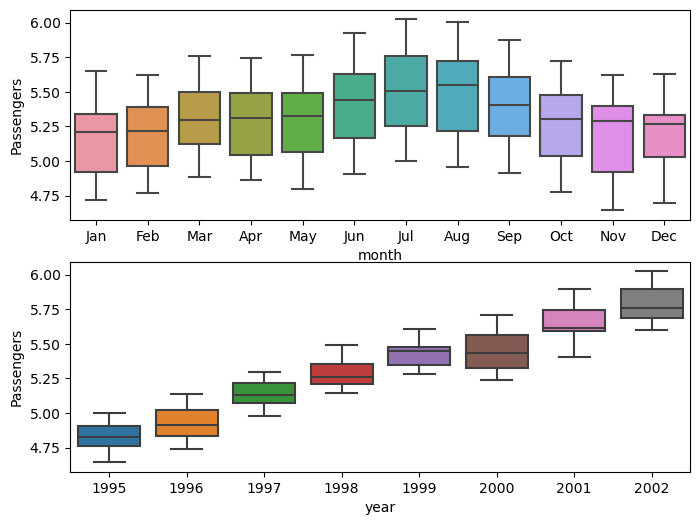

In [51]:
# Boxplot 
plt.figure(figsize = (8,6))
plt.subplot(211)
sns.boxplot(x = "month", y = "Passengers", data = data1)
plt.subplot(212)
sns.boxplot(x = "year", y = "Passengers", data = data1)

<Axes: xlabel='year', ylabel='Passengers'>

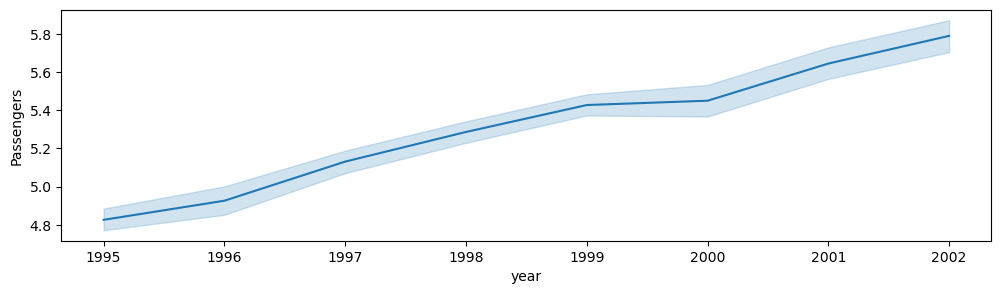

In [55]:
# line plot
plt.figure(figsize = (12,3))
sns.lineplot(x = "year", y = "Passengers", data = data1)

# Splitting data

In [56]:
# splitting into training and testing data
Train = data1.head(81)
Test = data1.tail(14)

# 1. Linear Model

In [57]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

0.12664097753786874

# 2. Exponential

In [58]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

0.13079458956716636

# 3. Quadratic

In [59]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

0.12750005593945363

# 4. Additive Seasonality 

In [60]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

0.5507316714899788

# 5. Additive Seasonality Quadratic 

In [61]:
# Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

0.09220941335834124

# 6. Multiplicative Seasonality

In [62]:
# Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

0.55757113717509

# 7. Multiplicative Additive Seasonality 

In [63]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

0.04134613649429353

# Comparing all the results

In [64]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,0.041346
4,rmse_add_sea_quad,0.092209
0,rmse_linear,0.126641
2,rmse_Quad,0.127500
1,rmse_Exp,0.130795
3,rmse_add_sea,0.550732
5,rmse_Mult_sea,0.557571


In [66]:
# descripive/statistical information
data['RMSE_Values'].describe()

count    7.000000
mean     0.232399
std      0.222013
min      0.041346
25%      0.109425
50%      0.127500
75%      0.340763
max      0.557571
dtype: float64

In [67]:
data['RMSE_Values'].var()

0.04928982156480599

Models Used:
1. Linear
2. Quadratic
3. Exponential
4. Additive Seasonality
5. Additive seasonality with quadratic trend
6. Multiplicative seasonality
7. Multiplicative additive seasonality

Therefore, comparing all the RMSE values, it is found that- 
1. The RMSE value of Multiplicative additive seasonality is found to be the least one with 0.04.
2. It gives a proper idea that the model has the least error among all other models.
3. It ensures that the model has the highest accuracy among all other models.
4. Dummies used:  Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
5. Total dummies used: 12 dummies used